In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
missing_data = df.isnull().sum().sum()
missing_data

0

In [5]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

e:\code\vmpy\vm1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


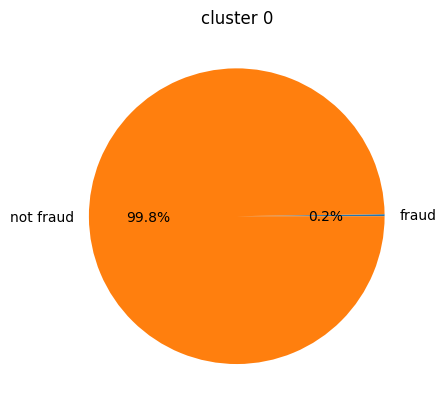

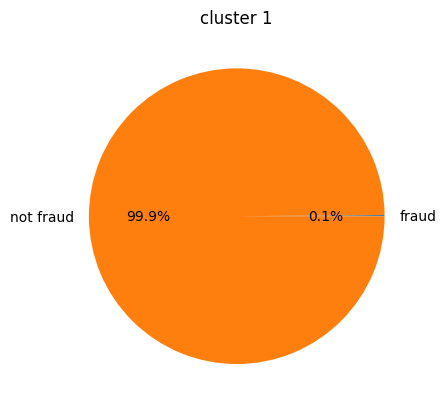

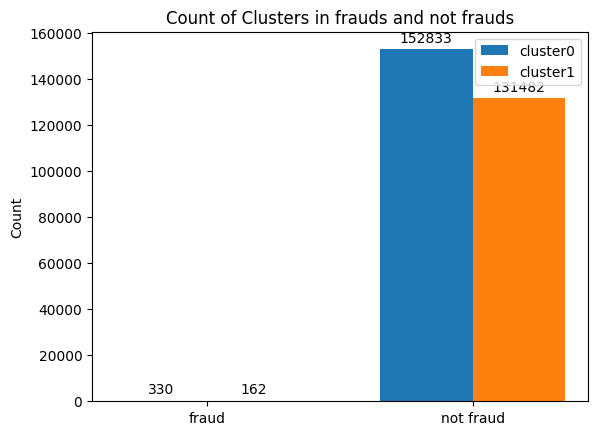

In [7]:
frauds0 = 0
notFrauds0 = 0
frauds1 = 0
notFrauds1 = 0

for i in range(len(labels)):
    if labels[i] == 0:
        if Y[i] == 1:
            frauds0 += 1
        else:
            notFrauds0 += 1
    else:
        if Y[i] == 1:
            frauds1 += 1
        else:
            notFrauds1 += 1


cluster0 = pd.Series([frauds0, notFrauds0])
cluster1 = pd.Series([frauds1, notFrauds1])
label = ['fraud', 'not fraud']


plt.pie(cluster0, labels=label, autopct='%1.1f%%')
plt.title('cluster 0')
plt.show()


plt.pie(cluster1, labels=label, autopct='%1.1f%%')
plt.title('cluster 1')
plt.show()

c0f, c1f, c0nf, c1nf = 0, 0, 0, 0
for i in range(len(Y)):
    if Y[i] == 1:
        if labels[i] == 0:
            c0f += 1
        else:
            c1f += 1
    else:
        if labels[i] == 0:
            c0nf += 1
        else:
            c1nf += 1

c0 = [c0f, c0nf]
c1 = [c1f, c1nf]
label = ['fraud', 'not fraud']

x = np.arange(len(label))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, c0, width, label='cluster0')
rects2 = ax.bar(x + width/2, c1, width, label='cluster1')

ax.set_ylabel('Count')
ax.set_title('Count of Clusters in frauds and not frauds')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

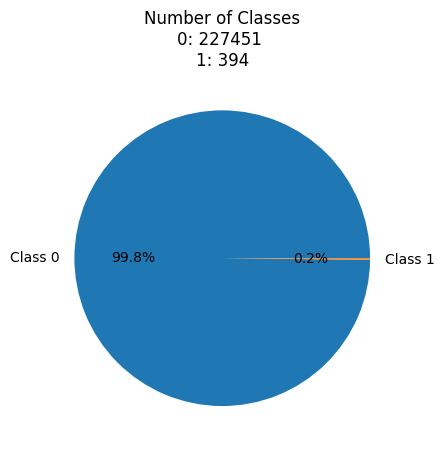

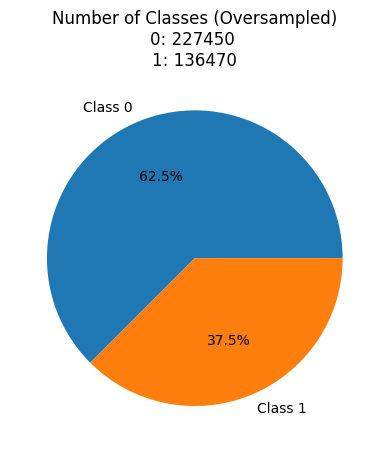

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


class_counts = Y_train.value_counts()
labels = ['Class 0', 'Class 1']
plt.pie(class_counts, labels=labels, autopct='%1.1f%%')
plt.title(f'Number of Classes\n0: {class_counts[0]} \n1: {class_counts[1]}')
plt.show()

# oversampling
smote = SMOTE(sampling_strategy=0.6)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# undersampling
undersampler = RandomUnderSampler(sampling_strategy=0.6)
X_train, Y_train = undersampler.fit_resample(X_train, Y_train)

# showing the results
oversampled_class_counts = Y_train.value_counts()
plt.pie(oversampled_class_counts, labels=labels, autopct='%1.1f%%')
plt.title(f'Number of Classes (Oversampled)\n0: {oversampled_class_counts[0]} \n1: {oversampled_class_counts[1]}')
plt.show()

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

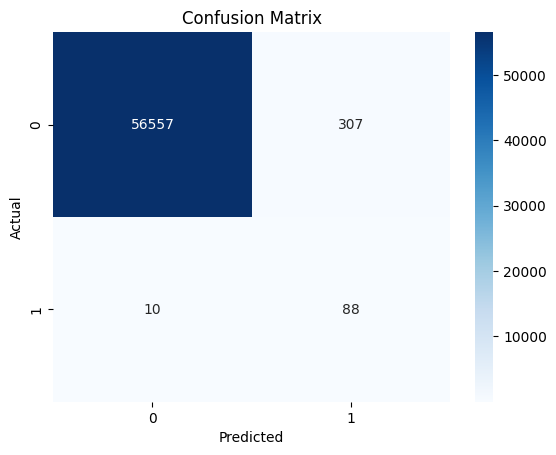

Accuracy: 0.99
F1 Score: 0.36


In [19]:
logreg = LogisticRegression(random_state=42, max_iter=100, solver='newton-cholesky')
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

f1 = f1_score(Y_test, Y_pred)
print(f'F1 Score: {f1:.2f}')

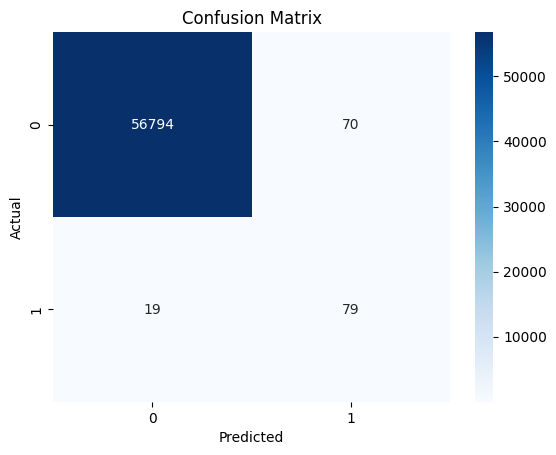

Accuracy: 1.00
F1 Score: 0.64


In [12]:
svm = SVC(C=0.1, gamma=1, kernel= 'poly', random_state=42)
svm.fit(X_train, Y_train)

Y_pred = svm.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
from sklearn.metrics import f1_score
print(f'F1 Score: {f1_score(Y_test, Y_pred):.2f}')